**End-to-end Machine Learning project**
**Ethan Pirso - 260863065**

**Context**
Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided?

**Content**
Globally, World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.

Employee ID: The unique ID allocated for each employee (example: fffe390032003000)
Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)
Gender: The gender of the employee (Male/Female)
Company Type: The type of company where the employee is working (Service/Product)
WFH Setup Available: Is the work from home facility available for the employee (Yes/No)
Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.
Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)
Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

**Acknowledgements**
A special thanks to the HackerEarth Competition on the topic "HackerEarth Machine Learning Challenge: Are your employees burning out? which can be accessed here for this data collection.

**Inspiration**
Try to build some really amazing predictions keeping in mind that happy and healthy employees are indisputably more productive at work, and in turn, help the business flourish profoundly.

# Get the Data

## Load the Data

In [1102]:
from pathlib import Path
import pandas as pd

burnout = pd.read_csv('employee_burnout.csv')

## Take a Quick Look at the Data Structure

In [1103]:
burnout.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [1104]:
burnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [1105]:
burnout["Burn Rate"].value_counts()

Burn Rate
0.47    475
0.43    444
0.41    434
0.45    431
0.50    428
       ... 
0.98     18
0.97     17
0.95     17
0.96     13
0.99      8
Name: count, Length: 101, dtype: int64

In [1106]:
burnout.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [1107]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

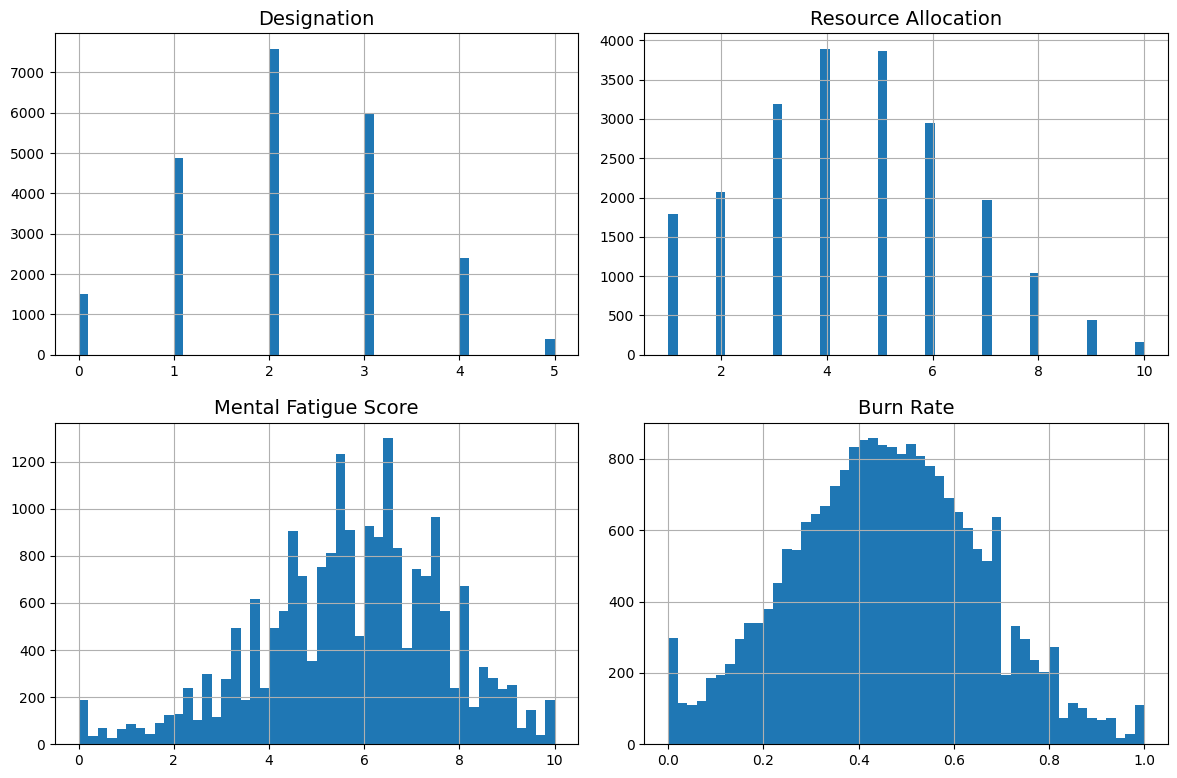

In [1108]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

burnout.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [1109]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [1110]:
train_set, test_set = shuffle_and_split_data(burnout, 0.2)
len(train_set)

18200

In [1111]:
len(test_set)

4550

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [1112]:
np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results as in the book, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

In [1113]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(burnout, test_size=0.2, random_state=42)

In [1114]:
test_set["Burn Rate"].isnull().sum()

240

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [1115]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


If you prefer simulations over maths, here's how you could get roughly the same result:

In [1116]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [1117]:
burnout["burnrate_cat"] = pd.cut(burnout["Burn Rate"],
                               bins=[0., 0.2, 0.4, 0.6, 0.8, 1.],
                               labels=[1, 2, 3, 4, 5])

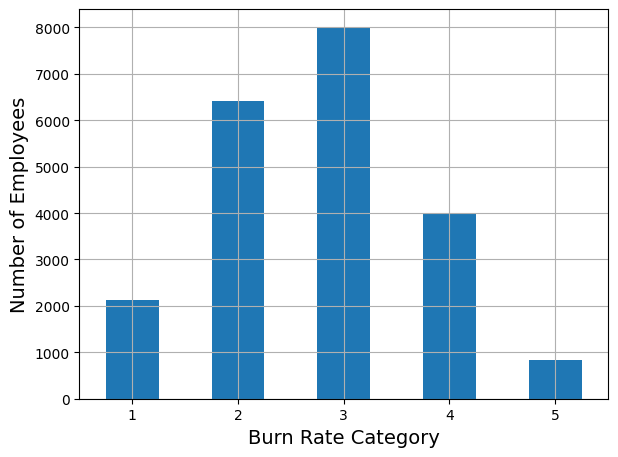

In [1118]:
burnout["burnrate_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Burn Rate Category")
plt.ylabel("Number of Employees")
save_fig("employee_burnrate_cat_bar_plot") 
plt.show()

# Discover and Visualize the Data to Gain Insights

In [1119]:
burnout = train_set.copy()

## Visualizing Geographical Data

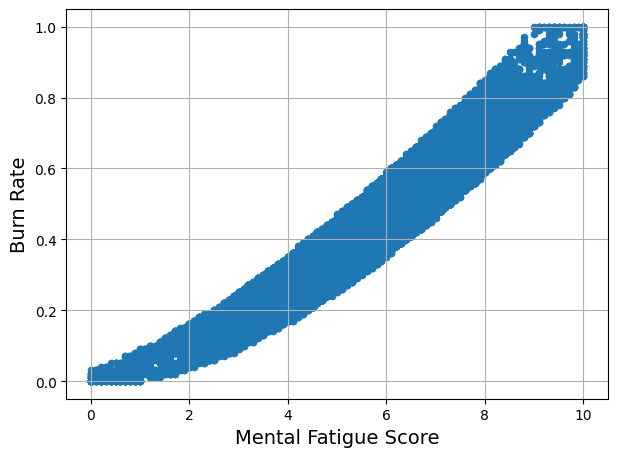

In [1120]:
burnout.plot(kind="scatter", x="Mental Fatigue Score", y="Burn Rate", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

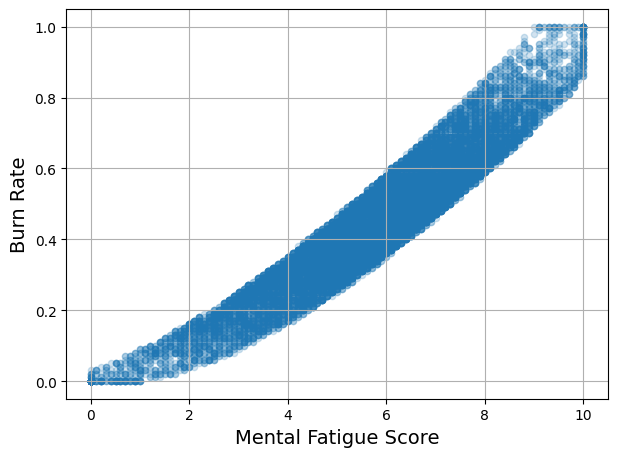

In [1121]:
burnout.plot(kind="scatter", x="Mental Fatigue Score", y="Burn Rate", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

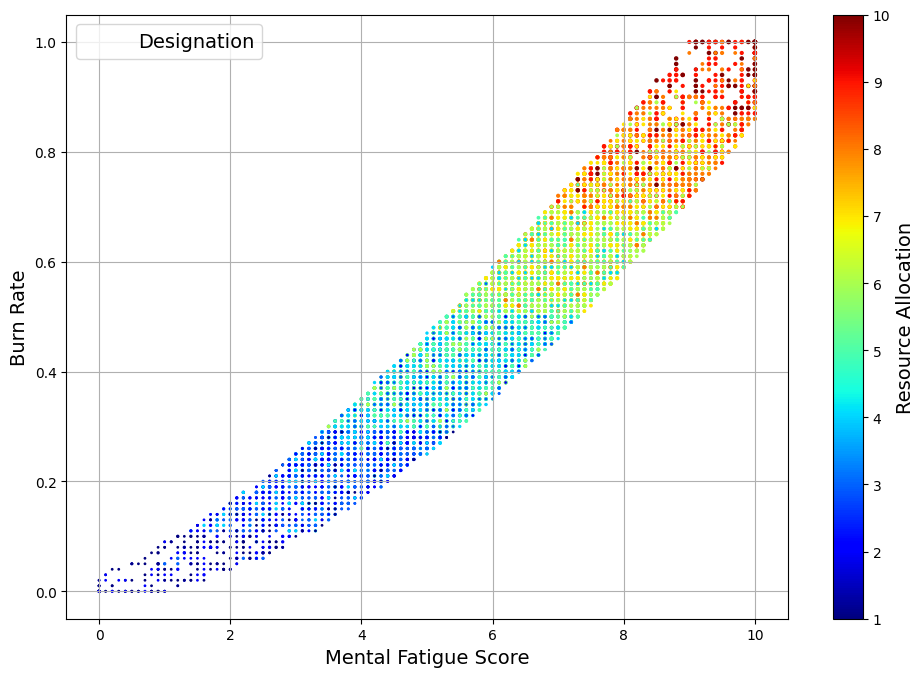

In [1122]:
burnout.plot(kind="scatter", x="Mental Fatigue Score", y="Burn Rate", grid=True,
             s=burnout["Designation"], label="Designation",
             c="Resource Allocation", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("burnout_scatterplot")  # extra code
plt.show()

The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

## Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [1123]:
corr_matrix = burnout.corr(numeric_only=True)

In [1124]:
corr_matrix["Burn Rate"].sort_values(ascending=False)

Burn Rate               1.000000
Mental Fatigue Score    0.944561
Resource Allocation     0.857688
Designation             0.740278
Name: Burn Rate, dtype: float64

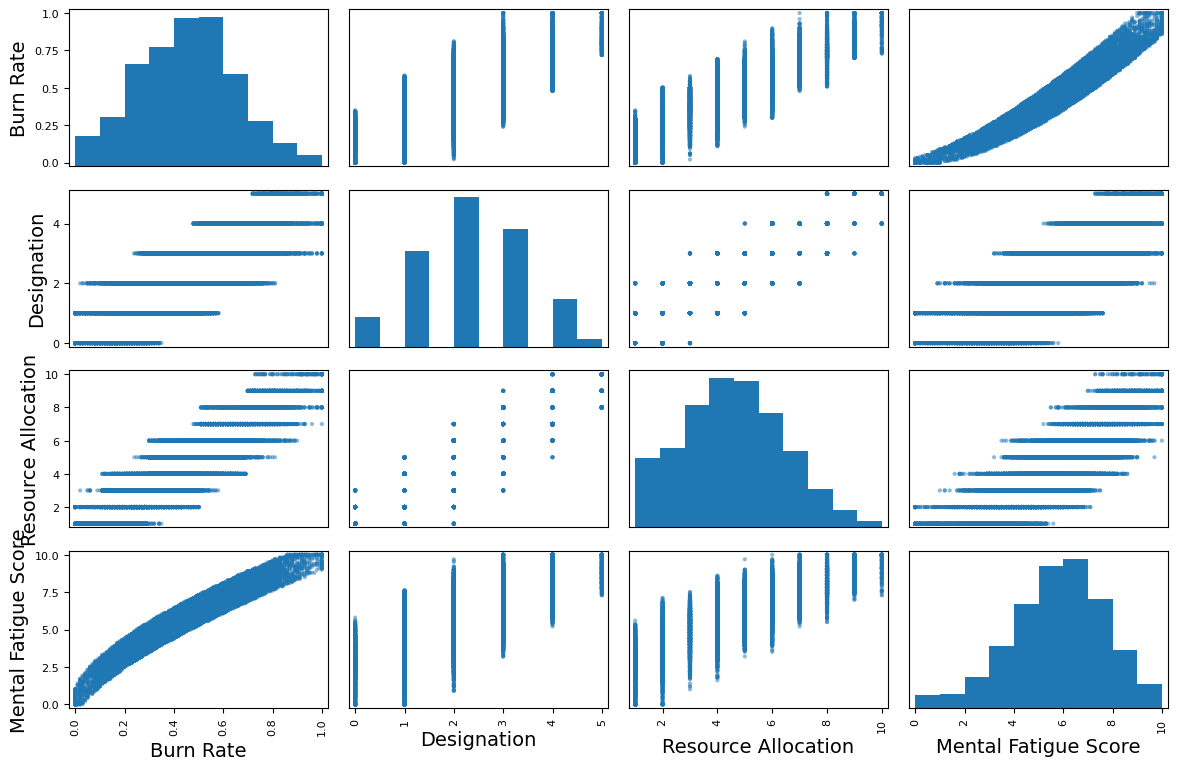

In [1125]:
from pandas.plotting import scatter_matrix

attributes = ["Burn Rate", "Designation", "Resource Allocation",
              "Mental Fatigue Score"]
scatter_matrix(burnout[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

## Experimenting with Attribute Combinations

In [1126]:
burnout["burnrate_resource_ratio"] = burnout["Burn Rate"] / burnout["Resource Allocation"]
burnout["resource_designation_ratio"] = burnout["Resource Allocation"] / burnout["Designation"]
burnout["mental_fatigue_designation_ratio"] = burnout["Mental Fatigue Score"] / burnout["Designation"]

In [1127]:
corr_matrix = burnout.corr(numeric_only=True)
corr_matrix["burnrate_resource_ratio"].sort_values(ascending=False)

burnrate_resource_ratio             1.000000
mental_fatigue_designation_ratio    0.588774
Mental Fatigue Score                0.158186
Burn Rate                           0.122967
resource_designation_ratio         -0.032674
Designation                        -0.285817
Resource Allocation                -0.307911
Name: burnrate_resource_ratio, dtype: float64

# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [1128]:
burnout = train_set.copy()

## Data Cleaning

In the book 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [1129]:
null_rows_idx = burnout.isnull().any(axis=1)
burnout.loc[null_rows_idx].head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
17557,fffe390036003900,2008-12-03,Female,Service,Yes,3.0,5.0,8.2,NaN
6020,fffe3800350038003600,2008-04-18,Male,Service,Yes,2.0,4.0,NaN,0.49
14712,fffe3500380031003700,2008-08-13,Female,Product,Yes,3.0,5.0,NaN,NaN
11677,fffe31003600340032003000,2008-12-01,Male,Service,Yes,3.0,NaN,NaN,NaN
7033,fffe32003000320036003800,2008-04-19,Female,Product,Yes,2.0,5.0,NaN,0.44


In [1130]:
burnout_option1 = burnout.copy()

burnout_option1.dropna(subset=["Mental Fatigue Score"], inplace=True)  # option 1

burnout_option1.loc[null_rows_idx].head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
17557,fffe390036003900,2008-12-03,Female,Service,Yes,3.0,5.0,8.2,NaN
387,fffe32003000300034003100,2008-10-01,Male,Service,Yes,4.0,NaN,6.9,0.69
4985,fffe3300340030003100,2008-01-09,Female,Service,Yes,1.0,NaN,4.6,0.30
18617,fffe31003200330038003000,2008-02-11,Male,Service,No,4.0,NaN,9.3,0.83
17935,fffe3200390031003400,2008-10-21,Female,Service,No,2.0,4.0,3.6,NaN


In [1131]:
burnout_option2 = burnout.copy()

burnout_option2.drop("Mental Fatigue Score", axis=1, inplace=True)  # option 2

burnout_option2.loc[null_rows_idx].head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Burn Rate
17557,fffe390036003900,2008-12-03,Female,Service,Yes,3.0,5.0,NaN
6020,fffe3800350038003600,2008-04-18,Male,Service,Yes,2.0,4.0,0.49
14712,fffe3500380031003700,2008-08-13,Female,Product,Yes,3.0,5.0,NaN
11677,fffe31003600340032003000,2008-12-01,Male,Service,Yes,3.0,NaN,NaN
7033,fffe32003000320036003800,2008-04-19,Female,Product,Yes,2.0,5.0,0.44


In [1132]:
burnout_option3 = burnout.copy()

median = burnout["Mental Fatigue Score"].median()
burnout_option3["Mental Fatigue Score"].fillna(median, inplace=True)  # option 3

burnout_option3.loc[null_rows_idx].head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
17557,fffe390036003900,2008-12-03,Female,Service,Yes,3.0,5.0,8.2,NaN
6020,fffe3800350038003600,2008-04-18,Male,Service,Yes,2.0,4.0,5.9,0.49
14712,fffe3500380031003700,2008-08-13,Female,Product,Yes,3.0,5.0,5.9,NaN
11677,fffe31003600340032003000,2008-12-01,Male,Service,Yes,3.0,NaN,5.9,NaN
7033,fffe32003000320036003800,2008-04-19,Female,Product,Yes,2.0,5.0,5.9,0.44


In [1133]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [1134]:
burnout_num = burnout.select_dtypes(include=[np.number])

In [1135]:
imputer.fit(burnout_num)

SimpleImputer(strategy='median')

In [1136]:
imputer.statistics_

array([2.  , 4.  , 5.9 , 0.45])

Check that this is the same as manually computing the median of each attribute:

In [1137]:
burnout_num.median().values

array([2.  , 4.  , 5.9 , 0.45])

Transform the training set:

In [1138]:
X = imputer.transform(burnout_num)

In [1139]:
imputer.feature_names_in_

array(['Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate'], dtype=object)

In [1140]:
burnout_tr = pd.DataFrame(X, columns=burnout_num.columns,
                          index=burnout_num.index)

In [1141]:
burnout_tr.loc[null_rows_idx].head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
17557,3.0,5.0,8.2,0.45
6020,2.0,4.0,5.9,0.49
14712,3.0,5.0,5.9,0.45
11677,3.0,4.0,5.9,0.45
7033,2.0,5.0,5.9,0.44


In [1142]:
imputer.strategy

'median'

In [1143]:
burnout_tr = pd.DataFrame(X, columns=burnout_num.columns,
                          index=burnout_num.index)

In [1144]:
burnout_tr.loc[null_rows_idx].head()  # not shown in the book

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
17557,3.0,5.0,8.2,0.45
6020,2.0,4.0,5.9,0.49
14712,3.0,5.0,5.9,0.45
11677,3.0,4.0,5.9,0.45
7033,2.0,5.0,5.9,0.44


Now let's drop some outliers:

In [1145]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [1146]:
outlier_pred

array([ 1,  1,  1, ...,  1,  1, -1])

If you wanted to drop outliers, you would run the following code:

In [1147]:
burnout = burnout.iloc[outlier_pred == 1]

## Handling Text and Categorical Attributes

In [1148]:
burnout_cat = burnout[["Gender", "Company Type", "WFH Setup Available"]]
burnout_cat.head(8)

,Gender,Company Type,WFH Setup Available
17557,Female,Service,Yes
6020,Male,Service,Yes
1739,Male,Service,Yes
14712,Female,Product,Yes
15387,Female,Service,No
8822,Female,Product,Yes
17464,Female,Product,Yes
11677,Male,Service,Yes


In [1149]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
burnout_cat_encoded = ordinal_encoder.fit_transform(burnout_cat)

In [1150]:
burnout_cat_encoded[:8]

array([[0., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 1.]])

In [1151]:
ordinal_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Product', 'Service'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [1152]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
burnout_cat_1hot = cat_encoder.fit_transform(burnout_cat)

In [1153]:
burnout_cat_1hot

<13337x6 sparse matrix of type '<class 'numpy.float64'>'
	with 40011 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [1154]:
burnout_cat_1hot.toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.]])

Alternatively, you can set `sparse_output=False` when creating the `OneHotEncoder` (note: the `sparse` hyperparameter was renamned to `sparse_output` in Scikit-Learn 1.2):

In [1155]:
cat_encoder = OneHotEncoder(sparse_output=False)
burnout_cat_1hot = cat_encoder.fit_transform(burnout_cat)
burnout_cat_1hot

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.]])

In [1156]:
cat_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Product', 'Service'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [1157]:
df_test = pd.DataFrame({"Gender": ["Male", "Female"],
                        "Company Type": ["Service", "Product"],
                        "WFH Setup Available": ["Yes", "No"]})
pd.get_dummies(df_test)

,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes
0,False,True,False,True,False,True
1,True,False,True,False,True,False


In [1158]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.]])

In [1159]:
df_test_unknown = pd.DataFrame({"Gender": ["Other", "Other"],
                        "Company Type": ["Other", "Unknown"],
                        "WFH Setup Available": ["Maybe", "Unknown"]})
pd.get_dummies(df_test_unknown)

,Gender_Other,Company Type_Other,Company Type_Unknown,WFH Setup Available_Maybe,WFH Setup Available_Unknown
0,True,True,False,True,False
1,True,False,True,False,True


In [1160]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [1161]:
cat_encoder.feature_names_in_

array(['Gender', 'Company Type', 'WFH Setup Available'], dtype=object)

In [1162]:
cat_encoder.get_feature_names_out()

array(['Gender_Female', 'Gender_Male', 'Company Type_Product',
       'Company Type_Service', 'WFH Setup Available_No',
       'WFH Setup Available_Yes'], dtype=object)

In [1163]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [1164]:
df_output

,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling

In [1165]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(burnout_num)

In [1166]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
burnout_num_std_scaled = std_scaler.fit_transform(burnout_num)
burnout_num_std_scaled

array([[ 0.71963232,  0.25258287,  1.2830065 ,         nan],
       [-0.15843876, -0.23453514,         nan,  0.19041127],
       [-0.15843876,  0.25258287,  0.60746345,  0.84357323],
       ...,
       [-0.15843876, -0.23453514,  0.4515689 ,  0.59235709],
       [-1.03650985, -1.20877116, -0.06807959, -0.26177778],
       [-1.91458093, -1.69588917, -0.89951719,         nan]])

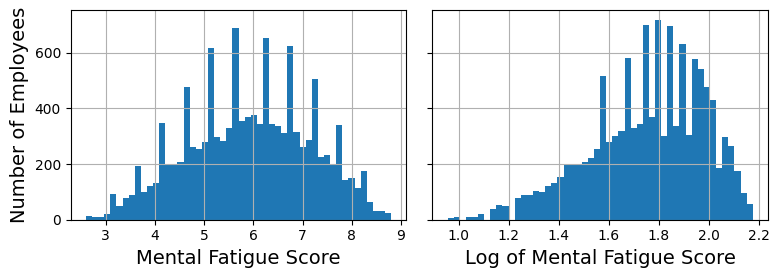

In [1167]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
burnout["Mental Fatigue Score"].hist(ax=axs[0], bins=50)
burnout["Mental Fatigue Score"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Mental Fatigue Score")
axs[1].set_xlabel("Log of Mental Fatigue Score")
axs[0].set_ylabel("Number of Employees")
save_fig("long_tail_plot")
plt.show()

## Date Transformation

In [1168]:
current_date = pd.to_datetime('today')

burnout["Date of Joining"] = pd.to_datetime(burnout["Date of Joining"])
test_set["Date of Joining"] = pd.to_datetime(test_set["Date of Joining"])

In [1169]:
def create_days_count(data):
    return current_date - data["Date of Joining"]

burnout["days_count"] = burnout.apply(create_days_count, axis=1)
burnout["days_count"] = burnout["days_count"].dt.days

test_set["days_count"] = test_set.apply(create_days_count, axis=1)
test_set["days_count"] = test_set["days_count"].dt.days

In [1170]:
min_value = burnout["days_count"].min()
max_value = burnout["days_count"].max()
burnout["days_count"] = (burnout["days_count"] - min_value) / (max_value - min_value)

min_value = test_set["days_count"].min()
max_value = test_set["days_count"].max()
test_set["days_count"] = (test_set["days_count"] - min_value) / (max_value - min_value)

## Transformation Pipelines

In [1171]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

def preprocess_dataframe(df, numeric_cols, categorical_cols):
    # Create a copy of the dataframe to avoid changing the original data
    df_processed = df.copy()

    # Median imputation for numeric columns
    median_imputer = SimpleImputer(strategy='median')
    df_processed[numeric_cols] = median_imputer.fit_transform(df_processed[numeric_cols])

    # Standard scaling for numeric columns
    scaler = StandardScaler()
    df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

    # Ordinal encoding for categorical columns
    if categorical_cols:  # Check if there are categorical columns
        ordinal_encoder = OrdinalEncoder()
        df_processed[categorical_cols] = ordinal_encoder.fit_transform(df_processed[categorical_cols])

    return df_processed

In [1172]:
num_attribs = ["Designation", "Resource Allocation", "Mental Fatigue Score", "days_count", "Burn Rate"]
cat_attribs = ["Gender", "Company Type", "WFH Setup Available"]

burnout_prepared = preprocess_dataframe(burnout, num_attribs, cat_attribs)

In [1173]:
burnout_prepared.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
17557,fffe390036003900,2008-12-03,0.0,1.0,1.0,0.971040,0.378985,1.901896,-0.005983,-1.487492
6020,fffe3800350038003600,2008-04-18,1.0,1.0,1.0,-0.226995,-0.344744,0.056211,0.225983,0.700642
1739,fffe33003300300036003600,2008-08-12,1.0,1.0,1.0,-0.226995,0.378985,0.811264,1.231171,-0.407758
14712,fffe3500380031003700,2008-08-13,0.0,0.0,1.0,0.971040,0.378985,0.056211,-0.005983,-0.417313
15387,fffe340032003900,2008-06-08,0.0,1.0,0.0,-0.226995,-0.344744,0.559579,-0.160627,0.213328


In [1174]:
# Finally remove unnecessary columns
burnout_prepared.drop(columns=["Employee ID", "Date of Joining"], inplace=True)

In [1175]:
burnout_prepared.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
17557,0.0,1.0,1.0,0.971040,0.378985,1.901896,-0.005983,-1.487492
6020,1.0,1.0,1.0,-0.226995,-0.344744,0.056211,0.225983,0.700642
1739,1.0,1.0,1.0,-0.226995,0.378985,0.811264,1.231171,-0.407758
14712,0.0,0.0,1.0,0.971040,0.378985,0.056211,-0.005983,-0.417313
15387,0.0,1.0,0.0,-0.226995,-0.344744,0.559579,-0.160627,0.213328


# Select and Train a Model

## Training and Evaluating on the Training Set

In [1176]:
burnout_labels = burnout_prepared["Burn Rate"].copy()
burnout_prepared.drop("Burn Rate", axis=1, inplace=True)

In [1177]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(burnout_prepared, burnout_labels)

LinearRegression()

Let's try the full preprocessing pipeline on a few training instances:

In [1178]:
burnout_predictions = lin_reg.predict(burnout_prepared)
burnout_predictions[:5]

array([ 1.2292206 , -0.09014992,  0.58956808,  0.05037638,  0.31164829])

Compare against the actual values:

In [1179]:
burnout_labels.iloc[:5].values

array([-0.00598309,  0.2259833 ,  1.23117098, -0.00598309, -0.16062735])

In [1180]:
# extra code – computes the error ratios discussed in the book
error_ratios = burnout_predictions[:5] / burnout_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-20644.9%, -139.9%, -52.1%, -942.0%, -294.0%


In [1181]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(burnout_labels, burnout_predictions,
                              squared=False)
lin_rmse

0.499278382896831

In [1182]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(burnout_prepared, burnout_labels)

DecisionTreeRegressor(random_state=42)

In [1183]:
burnout_predictions = tree_reg.predict(burnout_prepared)
tree_rmse = mean_squared_error(burnout_labels, burnout_predictions,
                              squared=False)
tree_rmse

0.05061246797019738

## Better Evaluation Using Cross-Validation

In [1184]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, burnout_prepared, burnout_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [1185]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.692243
std       0.012101
min       0.677579
25%       0.685222
50%       0.689732
75%       0.696732
max       0.714385
dtype: float64

In [1186]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, burnout_prepared, burnout_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      0.499473
std       0.010274
min       0.488991
25%       0.491297
50%       0.494676
75%       0.508304
max       0.515347
dtype: float64

**Warning:** the following cell may take a few minutes to run:

In [1187]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(forest_reg, burnout_prepared, burnout_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [1188]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.524293
std       0.007511
min       0.513291
25%       0.521005
50%       0.524349
75%       0.525624
max       0.537127
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [1189]:
forest_reg.fit(burnout_prepared, burnout_labels)
burnout_predictions = forest_reg.predict(burnout_prepared)
forest_rmse = mean_squared_error(burnout_labels, burnout_predictions,
                                 squared=False)
forest_rmse

0.20022922212967945

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Fine-Tune Your Model

## Randomized Search

In [1190]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

**Warning:** the following cell may take a few minutes to run:

In [1191]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'max_depth': randint(low=3, high=50),
                  'max_features': randint(low=2, high=20),
                  'min_samples_leaf': randint(low=1, high=10)}

rnd_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(burnout_prepared, burnout_labels)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CB8575BA50>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CB9B1BC4D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CB9BA6E710>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [1192]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,0.950872,0.002265,0.027439,0.000422,9,10,7,"{'max_depth': 9, 'max_features': 10, 'min_samp...",-0.486927,-0.489577,-0.485781,-0.487428,0.001590,1
6,0.501473,0.007162,0.033485,0.001417,23,2,6,"{'max_depth': 23, 'max_features': 2, 'min_samp...",-0.487235,-0.491933,-0.487722,-0.488963,0.002109,2
8,0.844122,0.005437,0.034836,0.000233,46,4,5,"{'max_depth': 46, 'max_features': 4, 'min_samp...",-0.487450,-0.493492,-0.487976,-0.489639,0.002733,3
0,1.154508,0.008169,0.032160,0.000356,41,16,8,"{'max_depth': 41, 'max_features': 16, 'min_sam...",-0.489890,-0.494893,-0.490645,-0.491809,0.002202,4
2,1.147304,0.005750,0.031778,0.000641,25,12,8,"{'max_depth': 25, 'max_features': 12, 'min_sam...",-0.489890,-0.494893,-0.490645,-0.491809,0.002202,4


## Analyze the Best Models and Their Errors

In [1193]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model.feature_importances_
feature_importances.round(2)

array([0.  , 0.  , 0.01, 0.01, 0.08, 0.87, 0.02])

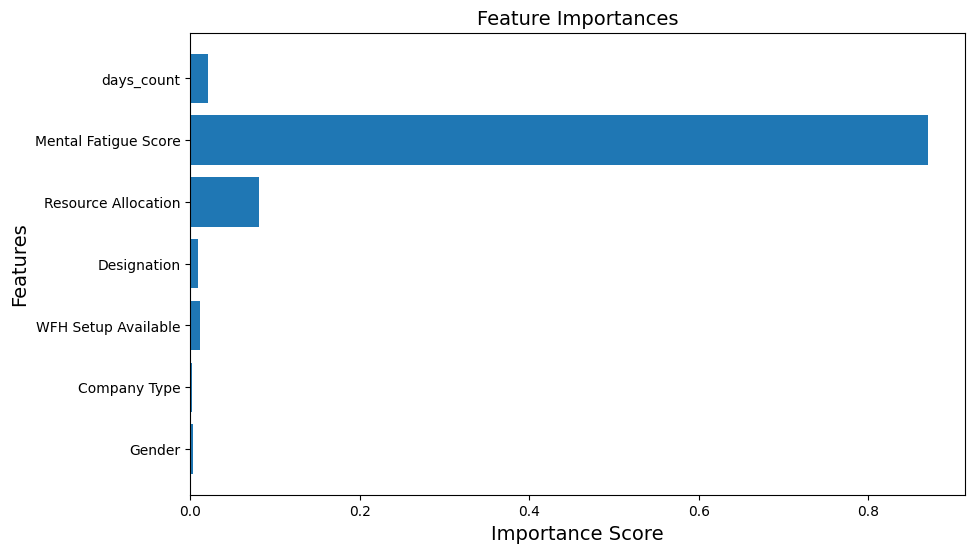

In [1194]:
# Convert the series to a DataFrame and reset the index
feature_importances_df = pd.DataFrame(feature_importances).reset_index()

# Rename columns for clarity
feature_importances_df.columns = ['index', 'importance_score']

# Extract feature names and match them with the indices
feature_names = burnout_prepared.columns
feature_importances_df['feature_names'] = feature_importances_df['index'].apply(lambda x: feature_names[x])

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature_names'], feature_importances_df['importance_score'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## Evaluate Your System on the Test Set

In [1195]:
test_set = preprocess_dataframe(test_set, num_attribs, cat_attribs)
test_set.drop(columns=['Date of Joining', 'Employee ID'], inplace=True)

X_test = test_set.drop("Burn Rate", axis=1)
y_test = test_set["Burn Rate"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

0.42019627282521066


We can compute a 95% confidence interval for the test RMSE:

In [1196]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.40750588, 0.43251448])

We could compute the interval manually like this:

In [1197]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.40750588253520764, 0.43251447500817736)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [1198]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.40750931164746196, 0.4325112441463337)

## Model persistence using joblib

Save the final model:

In [1199]:
import joblib

joblib.dump(final_model, "employee_burnout_model.pkl")

['employee_burnout_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [1200]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("employee_burnout_model.pkl")

new_data = burnout_prepared.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [1201]:
predictions

array([ 1.20316434, -0.451159  ,  0.69681636, -0.20884248,  0.36504156])